In [1]:
import torch
import torch.nn as nn
import numpy as np
from PIL import Image
from utils import *
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import CIFAR10
from torchvision.utils import make_grid
from matplotlib import pyplot as plt

In [2]:
dataset = CIFAR10("CIFAR10", train=False,transform=tranform)
loader = DataLoader(dataset, batch_size=8, pin_memory=True, shuffle=True)

Mix up and different pooling testing

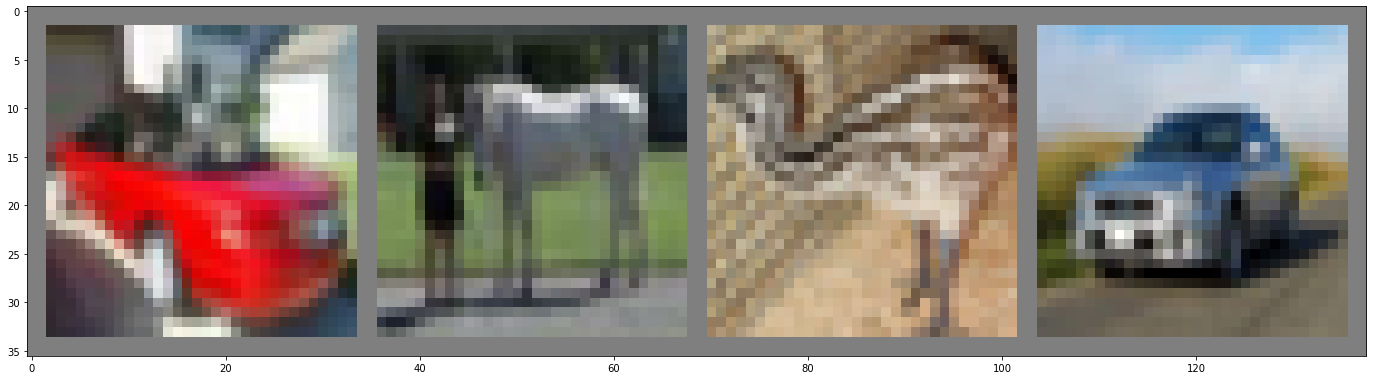

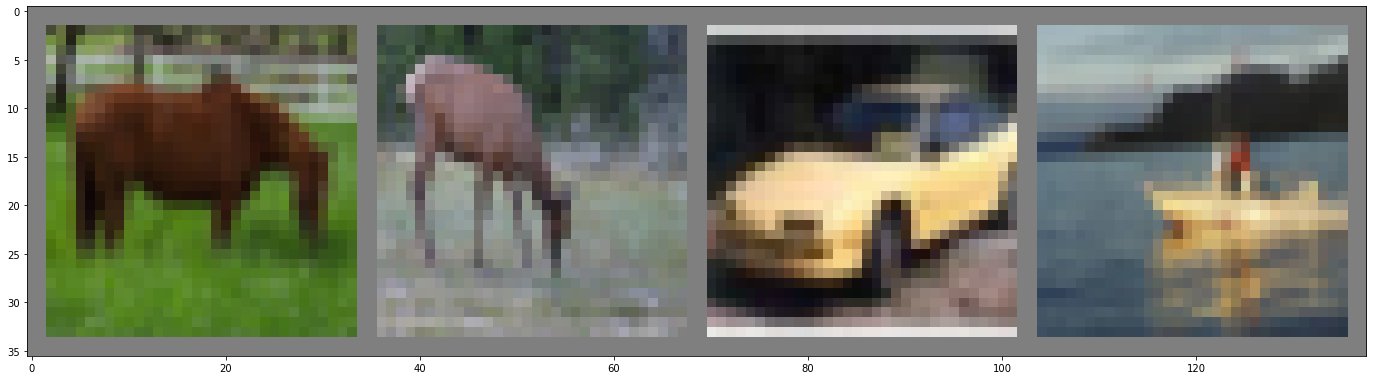

tensor([1, 7, 2, 1, 7, 4, 1, 8])


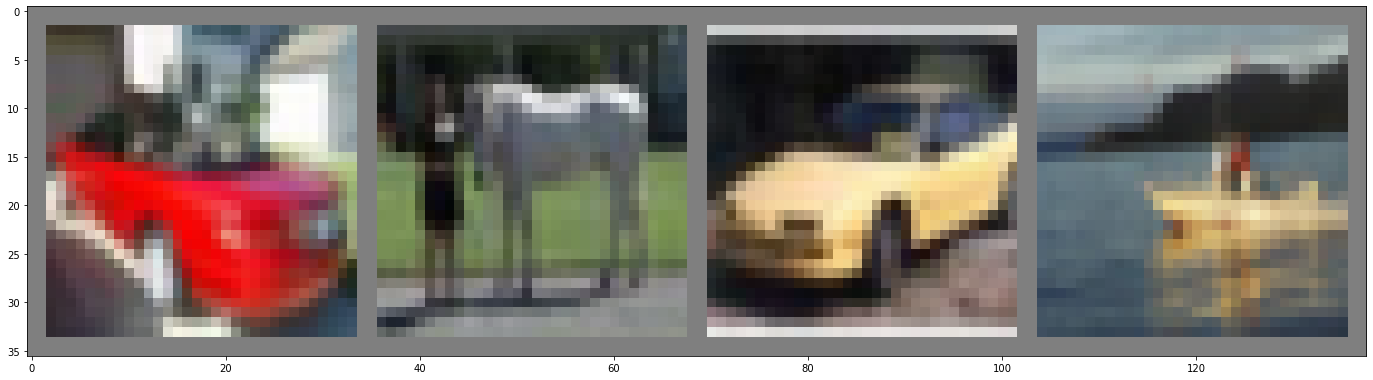

tensor([[0.0000e+00, 9.9993e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 7.2837e-05, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.1723e-07, 0.0000e+00,
         0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 9.9345e-01, 6.5487e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 6.4647e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 9.9354e-01, 0.0000e+00]])


In [3]:
for imgs, labels in loader:
    plt.figure(figsize=(24,24))
    plt.imshow(make_grid(imgs[:4]).permute(1,2,0) * 0.5 + 0.5)
    plt.show()
    plt.figure(figsize=(24,24))
    plt.imshow(make_grid(imgs[4:]).permute(1,2,0) * 0.5 + 0.5)
    plt.show()
    print(labels)
    imgs, labels = mix_up(imgs, labels)
    plt.figure(figsize=(24,24))
    plt.imshow(make_grid(imgs).permute(1,2,0) * 0.5 + 0.5)
    plt.show()
    print(labels)
    break




In [4]:
epsilon = torch.rand(3,1)
epsilon = epsilon.repeat(1,int(3 * 32 * 32)).reshape(-1,3,32,32)
# epsilon = epsilon.repeat(32)
print(epsilon[1,2,23,23], epsilon[1,1,23,23], epsilon[1,2,22,23],epsilon[1,2,30,23],epsilon[2,2,30,23],)
print(np.random.beta(0.2,0.2))

tensor(0.1319) tensor(0.1319) tensor(0.1319) tensor(0.1319) tensor(0.8808)
0.05390769683517018


torch.Size([1243, 1080, 3])


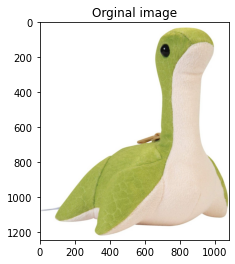

torch.Size([3, 77, 67])


D:\Anaconda\envs\pytorch\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


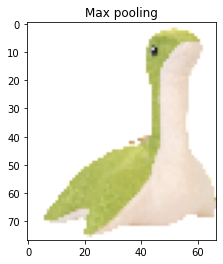

In [7]:
pooling = nn.AvgPool2d(2, stride=2)
image = (torch.Tensor(np.array(Image.open("boba.jpg")))/255)

print(image.shape)
plt.title("Orginal image")
plt.imshow(image)
plt.show()

image = nn.functional.max_pool2d(image.permute(2,0,1), kernel_size = 16, stride=16)
# image = pooling(image)
print(image.shape)

plt.title("Max pooling")
plt.imshow(image.permute(1,2,0))

Load and plot saved loss and accuracy curve